In [7]:
!pip install --upgrade numba==0.44.1

     |████████████████████████████████| 3.4MB 5.0MB/s 
  Found existing installation: numba 0.40.1
    Uninstalling numba-0.40.1:
      Successfully uninstalled numba-0.40.1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
import numpy as np
import pandas as pd
import networkx as nx
import networkx as nx
import community
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter
import networkx.algorithms.community 
from itertools import combinations, permutations

In [0]:
#!wget -q https://s3.eu-central-1.amazonaws.com/meetupsocialnetwork/group_nw_.csv
  
#!wget -q https://s3.eu-central-1.amazonaws.com/meetupsocialnetwork/groups_nodefile.csv

In [4]:
group_edge = pd.read_csv("Data Engineering/group_edges_pruned.csv")
group_node = pd.read_csv("group_nodes_pruned.csv")

print(group_node.head())
print(group_edge.head())

node_size = list(group_node['# Members'])
max_mem = max(node_size)
min_mem = min(node_size)
size_norm = [(float(i)-min_mem) /(max_mem - min_mem) for i in node_size]

   Unnamed: 0  Unnamed: 0.1  NodeId  ...     City         Date Created  Rating
0           0            11   15324  ...  Chicago  2003-10-22 21:39:49    4.79
1           1            17   22211  ...  Chicago  2003-04-17 19:31:25    4.72
2           2            20   24765  ...  Chicago  2003-04-29 20:53:16    4.53
3           3            21   25709  ...  Chicago  2003-04-30 20:06:30    4.51
4           6            32   33104  ...  Chicago  2002-12-08 19:43:12    4.52

[5 rows x 9 columns]
   Unnamed: 0  ...                                       comm_members
0        2462  ...  [819, 152870, 1771735, 1991724, 2089797, 23320...
1        2463  ...  [819, 1991724, 2089797, 2647049, 2781869, 2956...
2        2464  ...  [819, 10600, 1771735, 1991724, 2482081, 295629...
3        2465  ...  [819, 1345633, 2525803, 2647049, 2956298, 3000...
4        2466  ...  [819, 10600, 1771735, 1991724, 2089797, 233208...

[5 rows x 7 columns]


In [7]:
group_edge.head()
print(len(list(group_node['NodeId'])))
n1 = set(group_edge['group_from'])
n2 = set(group_edge['group_to'])

n4 = n1.union(n2)
n3 = set(group_node['NodeId'])
n5 = list(n3.intersection(n4))
print(len(n5))

samp = n3.difference(n5)

group_node.drop(group_node.loc[~group_node['NodeId'].isin(n5)].index, inplace=True)
print(len(list(group_node['NodeId'])))

3210
2254
2254


In [0]:
#df = pd.read_csv('group_edges_.csv')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(group_edge, source='group_from', target='group_to', edge_attr='weight', create_using=Graphtype)



In [0]:
degrees = dict(list(G.degree()))

In [104]:
group_edge.head()

,Unnamed: 0,Unnamed: 0.1,EdgeID,group_from,group_to,weight,comm_members
0,2462,2462,2462,514628,1294245,205,"[819, 152870, 1771735, 1991724, 2089797, 23320..."
1,2463,2463,2463,514628,1455470,97,"[819, 1991724, 2089797, 2647049, 2781869, 2956..."
2,2464,2464,2464,514628,1576866,88,"[819, 10600, 1771735, 1991724, 2482081, 295629..."
3,2465,2465,2465,514628,1681402,77,"[819, 1345633, 2525803, 2647049, 2956298, 3000..."
4,2466,2466,2466,514628,1780576,149,"[819, 10600, 1771735, 1991724, 2089797, 233208..."


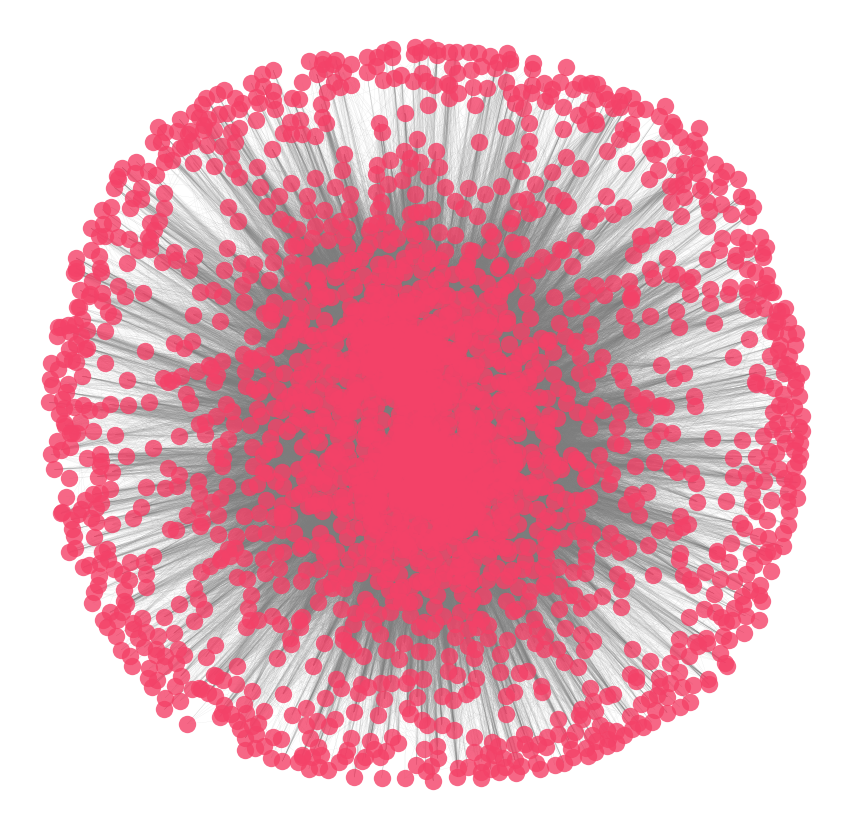

In [0]:
plt.figure(figsize=(15, 15))  
plt.axis('off')
nx.draw_networkx(G, alpha=0.8, node_color = "#f44268", linewidths=0.03, width=0.05,edge_color="#737373", with_labels=False, pos= nx.spring_layout(G, k=2))
plt.show(G)

In [0]:
partition = community.best_partition(G)  # compute communities
count= Counter(partition.values())
print(count)
values = []
for node in G.nodes():
  if count[partition.get(node)] > 1: 
    values.append(partition.get(node)+14)
  else: 
    values.append(1)

Counter({1: 1311, 0: 667, 2: 218, 4: 36, 3: 18, 5: 2, 6: 2})


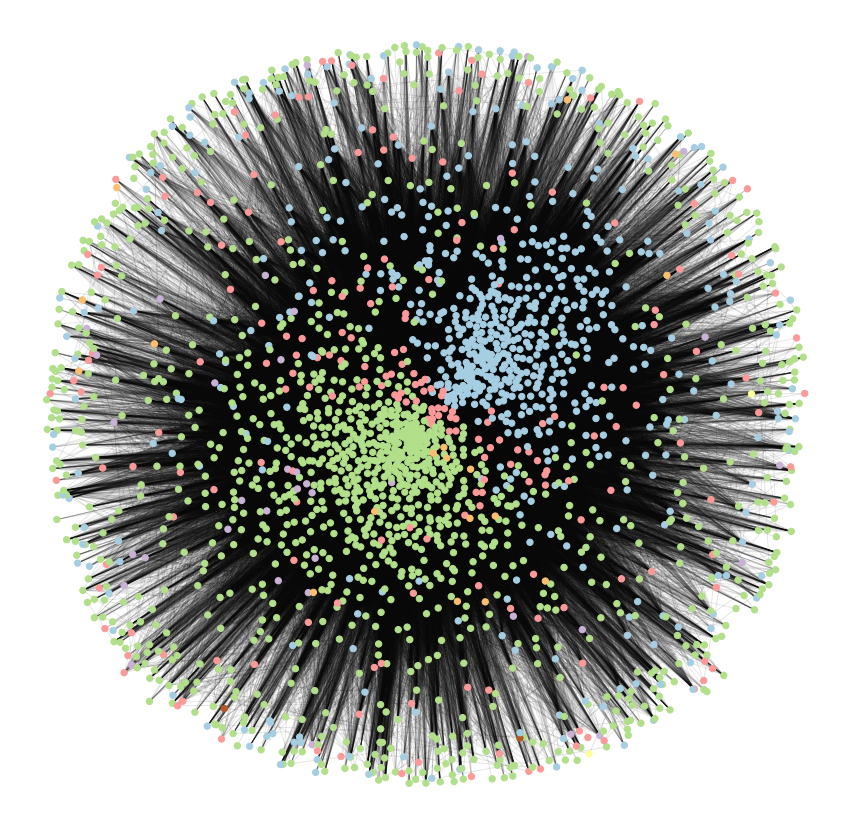

In [0]:
pos = nx.spring_layout(G, k=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.get_cmap('Paired'), node_color=values)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show(G)

In [8]:
u = list(group_edge['group_from'])
v = list(group_edge['group_to'])
nodes = list(group_node['NodeId'])


edges = []
for i in range(len(u)):
  edges.append((u[i], v[i]))
  
print(len(edges))

371319


In [0]:
jacc_cf = nx.jaccard_coefficient(G, edges)

In [0]:
RoleSim = pd.DataFrame(index=nodes, columns=nodes)
RoleSim = RoleSim.fillna(1)

In [15]:
RoleSim[1294245][5531942] = 3
print(RoleSim[1294245][5531942])

3


In [0]:
list_jacc = []
for i in range(371319):
  jj = next(jacc_cf)
  RoleSim[jj[0]][jj[1]] = jj[2]
  RoleSim[jj[1]][jj[0]] = jj[2]

In [0]:
RoleSim.to_csv('rolesim.csv')

In [14]:
X = RoleSim.to_numpy()
print(X.shape)

(2254, 2254)


In [26]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle


af = AffinityPropagation(affinity = 'precomputed').fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels_ap = af.labels_
n_clusters_ = len(cluster_centers_indices)
'''

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
'''

"\n\ncolors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')\nfor k, col in zip(range(n_clusters_), colors):\n    class_members = labels == k\n    cluster_center = X[cluster_centers_indices[k]]\n    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')\n    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,\n             markeredgecolor='k', markersize=14)\n    for x in X[class_members]:\n        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)\n\nplt.title('Estimated number of clusters: %d' % n_clusters_)\nplt.show()\n"

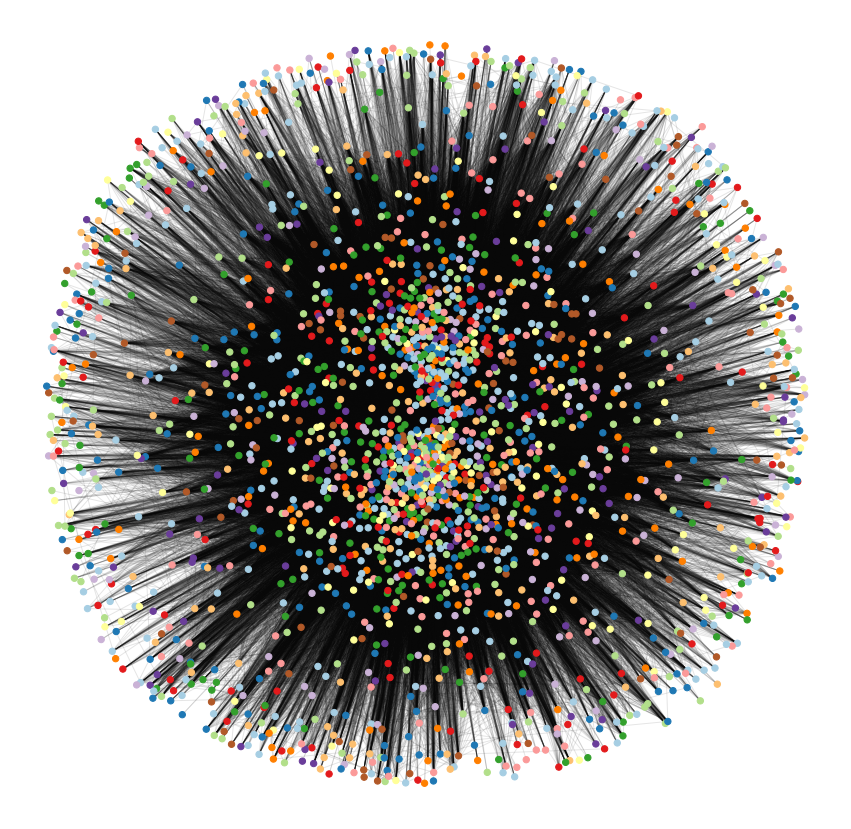

In [27]:
pos = nx.spring_layout(G, k=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.get_cmap('Paired'), node_color=labels_ap)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show(G)

In [93]:
from sklearn.cluster import SpectralClustering

sc3 = SpectralClustering(n_clusters = 3, affinity = 'precomputed').fit(X)
labels = sc3.labels_
print(type(labels))


<class 'numpy.ndarray'>


In [94]:
pos = nx.spectral_layout(G, dim=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.get_cmap('Paired'), node_color=labels)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show(G)

KeyboardInterrupt: ignored

In [31]:
np.unique(labels_sc).shape

(8,)

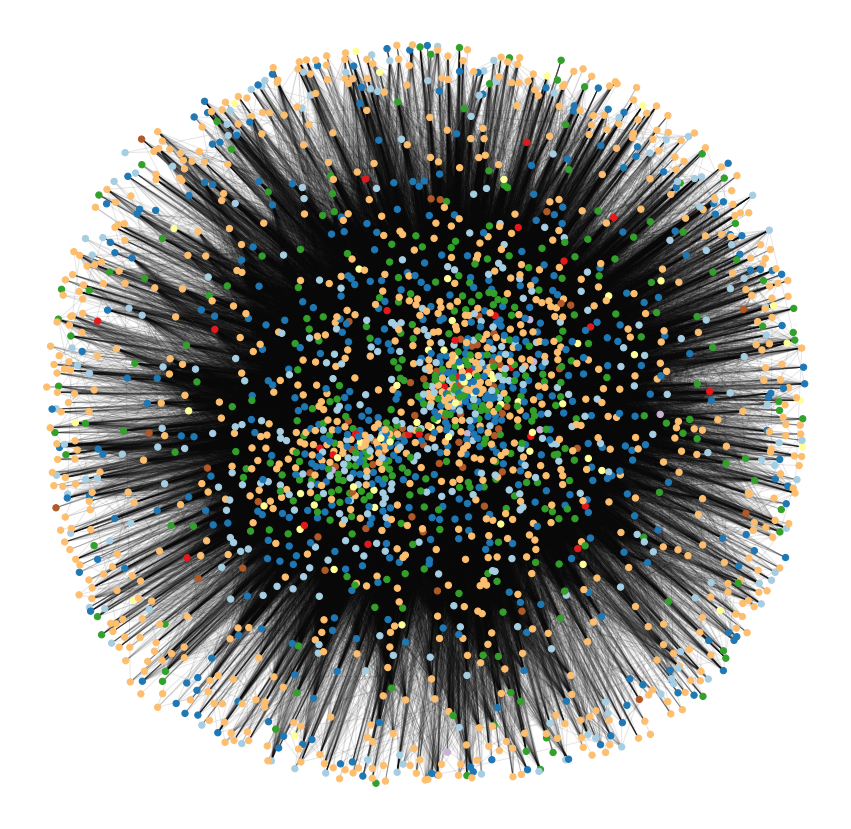

In [29]:
sc = SpectralClustering(affinity = 'precomputed').fit(X)
labels_sc = sc.labels_

pos = nx.spring_layout(G, k=2)  # compute graph layout
plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=plt.get_cmap('Paired'), node_color=labels_sc)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show(G)

In [6]:
from numba import njit
nodes = list(group_node["NodeId"])
node_pairs = list(combinations(nodes,2))
print(len(node_pairs))
RoleSim = {}
for pair in node_pairs:
  RoleSim[pair]=1
  
for node in nodes:
  RoleSim[(node, node)] = 1
 

2539131


In [57]:
print(rs['a'][2])

1


In [0]:
def calc_weight(u, v):
  
  neigh1 = list(group_edge.loc[group_edge['group_from'] == u]['group_to'])
  neigh2 = list(group_edge.loc[group_edge['group_from'] == v]['group_to'])
  if len(neigh1) > 10:
    neigh1 = shuffle(neigh1)[0:10]
  if len(neigh2) > 10:
    neigh2 = shuffle(neigh2)[0:10]
  max_weight = 0
  n = len(neigh1)
  v_trips = list(permutations(neigh2, n))
  del neigh2
  for triples in v_trips:
    temp = 0
    for t in range(n):
      if neigh1[t] < triples[t]:
        temp = temp + RoleSim[(neigh1[t], triples[t])]
      else:
        temp = temp + RoleSim[(triples[t], neigh1[t])]
    if temp > max_weight:
      max_weight = temp
  del v_trips
  del neigh1
  return max_weight, n

def calc_rolesim(nodes_pair, beta):
  for pair in node_pairs:
    
    if pair[0] < pair[1]: 
      wt, n = calc_weight(pair[0], pair[1])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta
      
    else:
      wt, n = calc_weight(pair[1], pair[0])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta

In [0]:
@njit
def calc_rolesim(nodes_pair, beta):
  for pair in nodes_pair:
    
    if pair[0] < pair[1]: 
      wt, n = calc_weight(pair[0], pair[1])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta
      
    else:
      wt, n = calc_weight(pair[1], pair[0])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta

In [0]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(group_edge, source='group_from', target='group_to', edge_attr='weight', create_using=Graphtype)

degrees = dict(list(G.degree()))

nodes = list(group_node["NodeId"])
node_pairs = list(combinations(nodes,2))

RoleSim = pd.DataFrame(index=nodes, columns=nodes)
RoleSim = RoleSim.fillna(1)

In [0]:
#RoleSim
def calc_weight(u, v):
  
    neigh1 = list(group_edge.loc[group_edge['group_from'] == u]['group_to'])
    neigh2 = list(group_edge.loc[group_edge['group_from'] == v]['group_to'])
    if len(neigh1) > 10:
        neigh1 = shuffle(neigh1)[0:10]
    if len(neigh2) > 10:
        neigh2 = shuffle(neigh2)[0:10]
    max_weight = 0
    n = len(neigh1)
    v_trips = list(permutations(neigh2, n))
    del neigh2
    for triples in v_trips:
        temp = 0
        for t in range(n):
            temp = temp + RoleSim[neigh1[t]][triples[t]]
            if temp > max_weight:
                max_weight = temp
    del v_trips
    del neigh1
    return max_weight, n

def calc_rolesim(nodes_pair, beta):
    for pair in node_pairs:
        print("Doing "+str(pair)+"...")
        if pair[0] < pair[1]: 
            wt, n = calc_weight(pair[0], pair[1])
    
        else:
            wt, n = calc_weight(pair[1], pair[0])
            
        RoleSim[pair[0]][pair[1]] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta
        RoleSim[pair[1]][pair[0]] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta


In [0]:
calc_rolesim(node_pairs, 0.4)

In [0]:
#Iceberg RoleSim

beta = 0.3
theta = 0.6
nodes = group_node["NodeId"]
print(nodes[0])

print(group_edge.shape[0])
group_edge.drop(group_edge.loc[group_edge['weight'] == 1].index, inplace=True)
group_edge.drop(group_edge.loc[group_edge['weight'] == 2].index, inplace=True)
group_edge.drop(group_edge.loc[group_edge['weight'] == 3].index, inplace=True)
group_edge.drop(group_edge.loc[group_edge['weight'] == 4].index, inplace=True)
print(group_edge.shape[0])
#temp = group_edge.loc[group_edge['group_from'] == nodes[0]]
#print(group_edge.loc[group_edge['group_from'] == nodes[0]].shape[0])
H = {}
node_pairs = list(combinations(nodes, 2))
RoleSim = {}
for pair in node_pairs:
  RoleSim[pair] = 1
  
  
def calc_weight(u, v):
  neigh1 = list(group_edge.loc[group_edge['group_from'] == u]['group_to'])
  neigh2 = list(group_edge.loc[group_edge['group_from'] == v]['group_to'])
  max_weight = 0
  n = len(neigh1)
  v_trips = list(combinations(neigh2, n))
  del neigh2
  for triples in v_trips:
    for n1 in neigh1:
      temp = RoleSim[(n1, triples[0])] + RoleSim[(n1, triples[1])] + RoleSim[(n1, triples[2])]
      if temp > max_weight:
        max_weight = temp
  return max_weight, n
  

for n1 in nodes:
  for n2 in nodes:
    if n1 == n2:
      continue
    if (theta * degrees[n1][0] < degrees[n2][0] < degrees[n1][0]):
      m11 = (1 - beta) * (min(degrees[n1][1][0])/max(degrees[n2][1][0])) + beta
      if (degrees[n2][1][0] <= degrees[n1][1][0]) and (degrees[n1][0] -1 + m11 < theta * degrees[n2][0]):
        continue
      if n1 < n2:
        w = calc_weight(n1, n2)
      else:
        w = calc_weight(n2, n1)
      if (w >= theta * degrees[n1][0]):
        H[(n1, n2)] = ((1 - beta) * w )/degrees[n1][0] + beta
      
      
def calc_rolesim(nodes_pair, beta):
  for pair in nodes_pair:
    
    if pair[0] < pair[1]: 
      wt, n = calc_weight(pair[0], pair[1])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta
      
    else:
      wt, n = calc_weight(pair[1], pair[0])
      RoleSim[pair] = ((1 - beta) * (wt / (degrees[pair[0]]) + degrees[pair[1]] - n)) + beta

6388
10969547
3105083


NameError: ignored